In [1]:
"""
This notebook generates plots in Fig. 1 of the paper.
For example track plots, please see the example tracks directory.
"""

'\nThis notebook generates plots in Fig. 1 of the paper.\nFor example track plots, please see the example tracks directory.\n'

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
import os
import seaborn as sns
from scipy.stats import pearsonr, gaussian_kde

from matplotlib.colors import LinearSegmentedColormap
import mpl_scatter_density # needed for density scatter plots
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize

# COLORS:
# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list("white_viridis", [
    (0, "#ffffff"),
    (1e-20, "#440053"),
    (0.2, "#404388"),
    (0.4, "#2a788e"),
    (0.6, "#21a784"),
    (0.8, "#78d151"),
    (1, "#fde624"),
], N=256)
# "Viridis-like" colormap with white background
white_viridis_r = LinearSegmentedColormap.from_list("white_viridis", [
    (0, "#ffffff"),
    (1e-20, "#fde624"),
    (0.4, "#78d151"),
    (0.6, "#21a784"),
    (0.7, "#2a788e"),
    (0.8, "#404388"),
    (1, "#440053"),
], N=256)
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]

In [10]:
# LOAD DATA

SCRATCH = "/Users/adamhe/github/scratch"

# Load model performances
personalized = h5py.File(
    os.path.join(SCRATCH, "personalized_performance_metrics_0.h5"),
)
reference = h5py.File(
    os.path.join(SCRATCH, "reference_performance_metrics_0.h5")
)

In [22]:
pearson = pd.DataFrame(
    {
        "personalized": personalized["track_pearson"][:],
        "reference": reference["track_pearson"][:],
    }
).dropna()

<Axes: xlabel='personalized', ylabel='reference'>

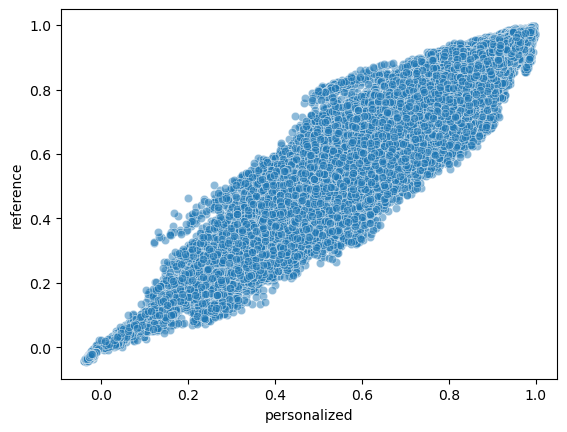

In [23]:
sns.scatterplot(
    data=pearson,
    x="personalized",
    y="reference",
    color=colors[0],
    alpha=0.5,
)

PearsonRResult(statistic=0.9493613158286998, pvalue=0.0)

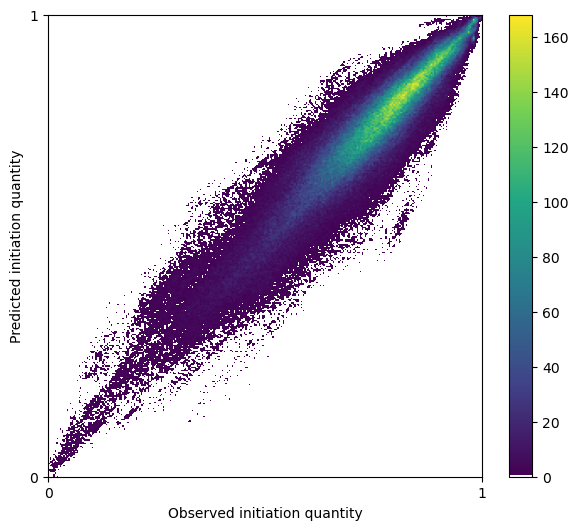

In [26]:
# Plot predicted vs observed log quantities

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(1, 1, 1, projection="scatter_density")
density = ax.scatter_density(
    pearson.reference, pearson.personalized, cmap=white_viridis
)
fig.colorbar(density)
ax.set_xlim(-0, 1)
ax.set_ylim(-0, 1)
ax.set_yticks([-0, 1])
#ax.set_yticklabels(["", ""])
ax.set_xticks([-0, 1])
#ax.set_xticklabels(["", ""])
ax.set_ylabel("Predicted initiation quantity")
ax.set_xlabel("Observed initiation quantity")
#plt.savefig("img/ensemble_predictions_log_sums.pdf")

pearsonr(pearson.reference, pearson.personalized)

nan